In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import seaborn as sns
import os
import sys
import xgboost as xgb
plt.rcParams['font.family'] = 'Malgun Gothic'

warnings.filterwarnings('ignore')

In [522]:
sys.path.append("C:/Users/user/github/Function/python/")

In [523]:
from Adaboost_regressor import *
from AdaBoostModel import *
from bayesian_update import *

In [524]:
df = pd.read_csv('C:/Users/user/github/Data/capstone/한국서부발전(주)_태양광 발전 현황_20220731.csv', encoding='cp949')
weather = pd.read_csv('C:/Users/user/github/Data/capstone/수원.csv', encoding='cp949')

In [525]:
df.head(1)

,발전기명,년월일,설비용량(MW),01시,02시,03시,04시,05시,06시,07시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,세종시폐기물매립장태양광,2017-01-01,1.628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,742080.0,334440.0,87240.0,2880.0,4320.0,0.0,0.0,0.0,0.0,0.0


In [526]:
df_se = df[df['발전기명']=='안산연성정수장태양광']

In [527]:
df_se = df_se.fillna(0)

In [528]:
df_se['년월일'] = pd.to_datetime(df_se['년월일'])

In [529]:
df_se.head(1)

,발전기명,년월일,설비용량(MW),01시,02시,03시,04시,05시,06시,07시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
2033,안산연성정수장태양광,2017-01-01,1.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,304800.0,230400.0,31200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [530]:
t = df_se[df_se['년월일'] <= '2021-08-31'].iloc[:,3:].values/1000

In [531]:
df_se[df_se['년월일'] <= '2021-08-31'].iloc[:,3:] = pd.DataFrame(t)

In [532]:
q = df_se.iloc[:,1:]

In [533]:
pd.date_range('2020-01-01','2022-07-31',freq='d')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31'],
              dtype='datetime64[ns]', length=943, freq='D')

In [534]:
tq = df_se[df_se['년월일']>='2020-01-01']

In [535]:
tq.reset_index(inplace=True)

In [536]:
tq.drop(['index'],axis=1, inplace=True)

In [537]:
tqq = tq.iloc[:,1:]

In [538]:
tqq = tqq.set_index(['년월일'])
tqq = tqq.iloc[:,1:]

In [539]:
tt = np.ravel(tqq)

In [540]:
len(tt)

22632

In [541]:
from datetime import datetime

In [542]:
time_ = pd.date_range('2020-01-01 01:00:00','2022-08-01 00:00:00',freq='h')

In [543]:
test = pd.DataFrame(time_,columns=['time'])

In [544]:
test['time'] = pd.to_datetime(test['time'])

In [545]:
test['value'] = tt.T

In [546]:
test = test.set_index(['time'])

In [547]:
test.iloc[:14609] = test.iloc[:14609]/1000

In [548]:
tr = test.iloc[:15842]
ts = test.iloc[15842:]

In [549]:
ts.head(30)

,value
time,
2021-10-22 03:00:00,0.0
2021-10-22 04:00:00,0.0
2021-10-22 05:00:00,0.0
2021-10-22 06:00:00,0.0
2021-10-22 07:00:00,0.0
2021-10-22 08:00:00,60.0
2021-10-22 09:00:00,229.2
2021-10-22 10:00:00,836.4
2021-10-22 11:00:00,1066.8


In [550]:
weather['일시'] = pd.to_datetime(weather['일시'])

we = weather[['일시','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','일조(hr)','일사(MJ/m2)','지면온도(°C)']]

In [551]:
we = weather.fillna(0)

In [552]:
we.columns

Index(['지점', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],
      dtype='object')

we = we.fillna(0)

In [553]:
we = we[['지점','일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)']]

In [554]:
total_weather = we[(we['일시']>'2020-01-01') & (we['일시'] <='2022-08-01 00:00:00')]

In [555]:
total_weather = total_weather.set_index(['일시'])

In [556]:
weather_tr = total_weather.iloc[:15842]
weather_ts = total_weather.iloc[15842:]

In [557]:
weather_ts['hour'] = weather_ts.index.hour
weather_tr['hour'] = weather_tr.index.hour

In [558]:
weather_ts.columns

Index(['지점', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)',
       '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'hour'],
      dtype='object')

In [559]:
from sklearn.preprocessing import MinMaxScaler

In [560]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [561]:
AdaBoostRegressor.base_estimator_

In [562]:
base_reg = DecisionTreeRegressor(max_depth= 7)

In [563]:
model_ada = AdaBoostRegressor(estimator= base_reg,n_estimators=100,random_state=0, learning_rate=0.1)

In [564]:
model_ada.fit(weather_tr, tr)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7),
                  learning_rate=0.1, n_estimators=100, random_state=0)

In [565]:
predict_ada = model_ada.predict(weather_ts)

In [566]:
model_ada.score(weather_ts, ts)

0.9060148140135422

In [567]:
AdaBoostRegressor.base_estimator_
base_reg = DecisionTreeRegressor(max_depth= 7)
model_ada = AdaBoostRegressor(estimator= base_reg,n_estimators=100,random_state=0, learning_rate=0.1)
model_ada.fit(weather_tr, tr)
predict_ada = model_ada.predict(weather_ts)

In [568]:
model_xgb = xgb.XGBRegressor(n_estimators=100,
                learning_rate=0.1,
                max_depth=5,
                subsample=0.8,
                colsample_bytree=0.8,
                objective='reg:squarederror',
                random_state=42)

In [569]:
model_xgb.fit(weather_tr, tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [570]:
y_pred_xgb = model_xgb.predict(weather_ts)

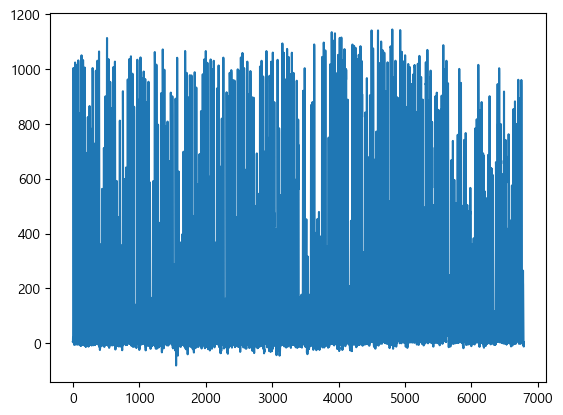

In [571]:
plt.plot(y_pred_xgb)

In [572]:
model_xgb.score(weather_ts, ts)

0.9165247508436712

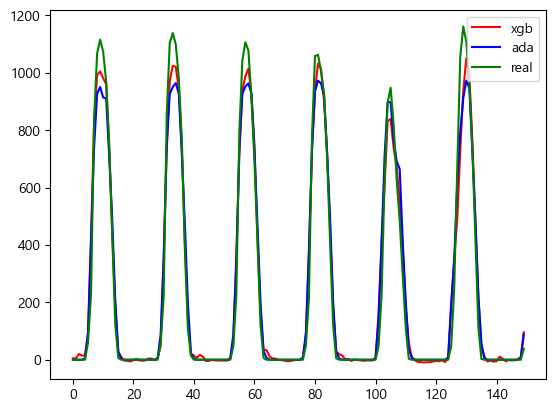

In [573]:
plt.plot(y_pred_xgb[:150], color = 'r', label = 'xgb')
plt.plot(predict_ada[:150], color = 'b', label = 'ada')
plt.plot(ts.values[:150], color = 'g', label = 'real')
plt.legend()
plt.show()

In [574]:
imp = list(model_xgb.feature_importances_)

In [575]:
col = ['지점', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '적설(cm)',
       '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'hour']

In [576]:
a = []
for i in range(len(col)):
    a.append([col[i], imp[i]])

In [577]:
dict(a)

{'지점': 0.0,
 '기온(°C)': 0.013382379,
 '강수량(mm)': 0.0031968271,
 '풍속(m/s)': 0.007890441,
 '풍향(16방위)': 0.0038214135,
 '습도(%)': 0.1945113,
 '증기압(hPa)': 0.024049524,
 '이슬점온도(°C)': 0.024286805,
 '현지기압(hPa)': 0.0049310937,
 '해면기압(hPa)': 0.0063594133,
 '적설(cm)': 0.03073567,
 '3시간신적설(cm)': 0.0,
 '전운량(10분위)': 0.1447236,
 '중하층운량(10분위)': 0.098570265,
 '최저운고(100m )': 0.0065585347,
 '시정(10m)': 0.004450632,
 '지면상태(지면상태코드)': 0.0,
 '현상번호(국내식)': 0.019255742,
 '지면온도(°C)': 0.13104656,
 '5cm 지중온도(°C)': 0.0,
 '10cm 지중온도(°C)': 0.0,
 '20cm 지중온도(°C)': 0.0,
 '30cm 지중온도(°C)': 0.0,
 'hour': 0.28222978}

In [578]:
imp_ada = model_ada.feature_importances_

In [579]:
b = []
for i in range(len(col)):
    b.append([col[i], imp_ada[i]])

In [580]:
dict(b)

{'지점': 0.0,
 '기온(°C)': 0.015568510903974533,
 '강수량(mm)': 0.0004921531797763838,
 '풍속(m/s)': 0.013322737465921934,
 '풍향(16방위)': 0.006384223784981392,
 '습도(%)': 0.19308409351871225,
 '증기압(hPa)': 0.011732618524300461,
 '이슬점온도(°C)': 0.011822624239135009,
 '현지기압(hPa)': 0.006979016936997367,
 '해면기압(hPa)': 0.0075379853933928076,
 '적설(cm)': 0.015330861880870891,
 '3시간신적설(cm)': 0.0,
 '전운량(10분위)': 0.09520334993908067,
 '중하층운량(10분위)': 0.010346670956244407,
 '최저운고(100m )': 0.01258535060883742,
 '시정(10m)': 0.017750345326637218,
 '지면상태(지면상태코드)': 0.0,
 '현상번호(국내식)': 0.0024164162413296366,
 '지면온도(°C)': 0.06749601219082044,
 '5cm 지중온도(°C)': 0.0,
 '10cm 지중온도(°C)': 0.0,
 '20cm 지중온도(°C)': 0.0,
 '30cm 지중온도(°C)': 0.0,
 'hour': 0.5119470289089874}

In [614]:
import numpy as np
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

In [582]:
AdaBoostRegressor.base_estimator_
base_reg = DecisionTreeRegressor(max_depth= 7)
model_ada = AdaBoostRegressor(estimator= base_reg,n_estimators=100,random_state=0, learning_rate=0.1)
model_ada.fit(weather_tr, tr)
predict_ada = model_ada.predict(weather_ts)

In [628]:
def ada_boost(X_train, y_train, X_test, num_estimators):
    AdaBoostRegressor.base_estimator_
    base_reg = DecisionTreeRegressor(max_depth= 7)
    model_ada = AdaBoostRegressor(estimator= base_reg,n_estimators=100,random_state=0, learning_rate=0.1)
    model_ada.fit(X_train, y_train)
    predict_ada = model_ada.predict(X_test)

    # model = AdaBoostRegressor(estimator= base_reg,n_estimators=100,random_state=0, learning_rate=0.1)
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    return predict_ada

def xgboost(X_train, y_train, X_test):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    params = {'max_depth': 3, 'eta': 0.1, 'silent': 1, 'objective': 'reg:squarederror'}
    num_round = 100
    model = xgb.train(params, dtrain, num_round)
    y_pred = model.predict(dtest)
    return y_pred

def lstm(X_train, y_train, X_test, look_back):
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, X_train.shape[1])))  # modify input shape
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    X_train = X_train.reshape((15842, 3, 24))
    X_train = X_train.reshape(-1, look_back, X_train.shape[1])  # modify reshaping
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)
    X_test_lstm = np.reshape(X_test, (X_test.shape[0], look_back, X_test.shape[1]))  # modify reshaping
    y_pred = model.predict(X_test_lstm)
    return y_pred.flatten()


def arima(X_train, y_train, X_test, order):
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()
    y_pred = model_fit.forecast(steps=len(X_test))
    return y_pred

def ensemble_predict(X_train, y_train, X_test, look_back, order, num_estimators):
    y_pred_ada = ada_boost(X_train, y_train, X_test, num_estimators)
    y_pred_xgb = xgboost(X_train, y_train, X_test)
    #X_test_lstm = X_test[-look_back:, :]  # get the last 'look_back' timesteps
    #y_pred_lstm = lstm(X_train, y_train, X_test_lstm, look_back)
    #y_pred_arima = arima(X_train, y_train, X_test, order)
    #y_pred = np.column_stack((y_pred_ada, y_pred_xgb, y_pred_lstm, y_pred_arima))
    y_pred = np.column_stack((y_pred_ada, y_pred_xgb))
    #weights = [0.25, 0.25, 0.25, 0.25]  # equal weighting
    weights = [0.5, 0.5]  # equal weighting
    weighted_predictions = np.average(y_pred, axis=1, weights=weights)
    return weighted_predictions


In [629]:
X_train, y_train = weather_tr.values, tr.values
X_test = weather_ts.values

# set the hyperparameters
look_back = 3
order = (2, 1, 0)
num_estimators = 50

# make the ensemble prediction
y_pred = ensemble_predict(X_train, y_train, X_test, look_back, order, num_estimators)

[00:36:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [630]:
mean_squared_error(ts, y_pred)

9549.738644730594

In [631]:
r2_score(ts, y_pred)

0.9078568611367922

In [632]:
a = ada_boost(weather_tr, tr, weather_ts, num_estimators)

In [633]:
b = xgboost(weather_tr, tr, weather_ts)

[00:36:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [622]:
c = arima(weather_tr, tr, weather_ts, order)

In [626]:
c = c.values

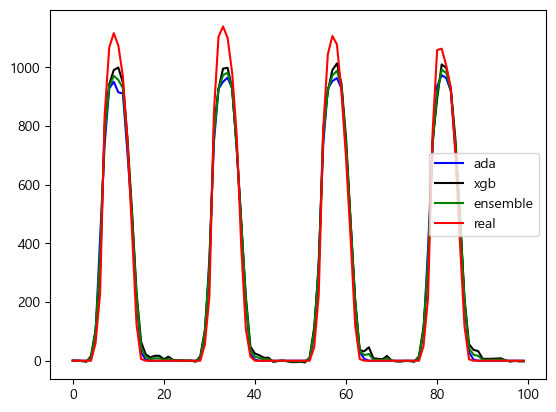

In [639]:
plt.plot(a[:100], color = 'b', label = 'ada')
plt.plot(b[:100], color = 'black', label = 'xgb')
plt.plot(y_pred[:100], color = 'g', label = 'ensemble')
plt.plot(ts.values[:100], color = 'r', label = 'real')
plt.legend()
plt.show()